In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = "data/uber_peru_2010.csv"

In [18]:
# Explore data
df = pd.read_csv(path, sep=';')

In [19]:
df.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,...,price_distance,price_duration,distance,duration,cost,cost_distance,cost_duration,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,16/11/2010 16:44,"-12,13983536","-77,02355957",16/11/2010 17:29,...,3626.0,195.0,11331.0,234.0,0.0,0.0,0.0,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,01/06/2010 0:34,"-12,13874817","-76,99536133",01/06/2010 0:37,...,NaN,NaN,0.0,0.0,0.0,NaN,NaN,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,31/05/2010 5:01,"-12,12453079","-77,02780151",31/05/2010 5:04,...,NaN,NaN,0.0,0.0,0.0,NaN,NaN,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,01/06/2010 0:29,"-12,13885117","-76,99530029",01/06/2010 0:32,...,NaN,NaN,0.0,0.0,0.0,NaN,NaN,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,11/09/2010 23:55,"-12,08995438","-76,92626953",12/09/2010 1:07,...,7665.0,562.0,30270.0,715.0,6173.0,5756.0,417.0,iPhone,4.0,5.0


In [21]:
print("Dataset has {} rows and {} columns".format(df.shape[0], df.shape[1]))

Dataset has 23111 rows and 28 columns


In [22]:
def deal_missing_data(df):
    '''
    A function to find out the missing data and its statistic information
    '''

    rec = []
    for column in df.columns:
        miss_count = df[column].isnull().sum(axis=0)
        miss_percent = miss_count / df.shape[0]
        rec.append([column, miss_count, miss_percent*100])
        df_stats = pd.DataFrame.from_records(rec, columns = ['column name', 'miss_count', 'miss_percent'])
        df_stats = df_stats.sort_values('miss_percent', axis=0, ascending=False)
    return df_stats

df_stats = deal_missing_data(df)

df_stats

,column name,miss_count,miss_percent
26,driver_score,15461,66.898879
27,rider_score,7721,33.408334
15,arrived_at,5395,23.343862
24,cost_duration,5073,21.950586
23,cost_distance,5073,21.950586
13,driver_start_lat,3490,15.101034
14,driver_start_lon,3490,15.101034
2,driver_id,3385,14.646705
3,taxi_id,3385,14.646705
19,price_duration,3170,13.716412


Text(0.5, 0, 'columns')

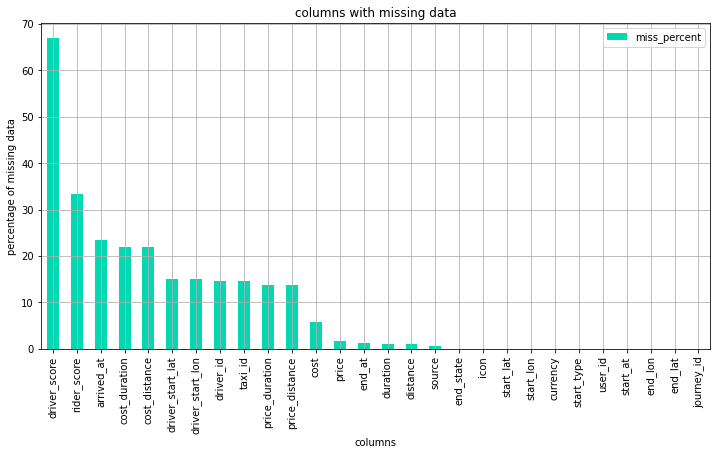

In [34]:
df_stats.plot.bar(x='column name', y='miss_percent', figsize=(12,6), grid=True, color = '#04D8B2')
plt.title('columns with missing data')
plt.ylabel('percentage of missing data')
plt.xlabel('columns')

Text(0.5, 0, 'number of missing data')

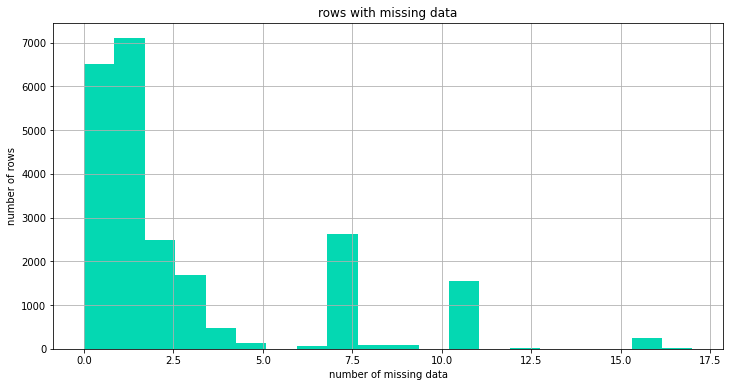

In [37]:
# Plot the missing rows
df.isnull().sum(axis=1).hist(bins = 20, color='#04D8B2', figsize=(12,6))
plt.title('rows with missing data')
plt.ylabel('number of rows')
plt.xlabel('number of missing data')

Text(0, 0.5, 'numbers of journey')

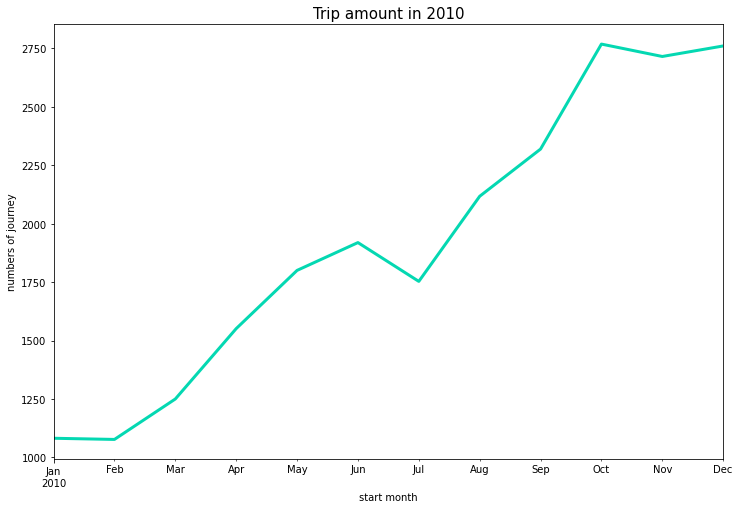

In [98]:
df['start_month_year'] = pd.DatetimeIndex(df['start_at']).to_period('M')
df['end_month_year'] = pd.DatetimeIndex(df['end_at']).to_period('M')

df.groupby(['start_month_year'])['journey_id'].count().plot(figsize = (12,8), linewidth=3, color='#04D8B2')
plt.title('Trip amount in 2010', fontsize=15)
plt.xlabel('start month')
plt.ylabel('numbers of journey')

Text(0.5, 1.0, 'Status when the trip ended')

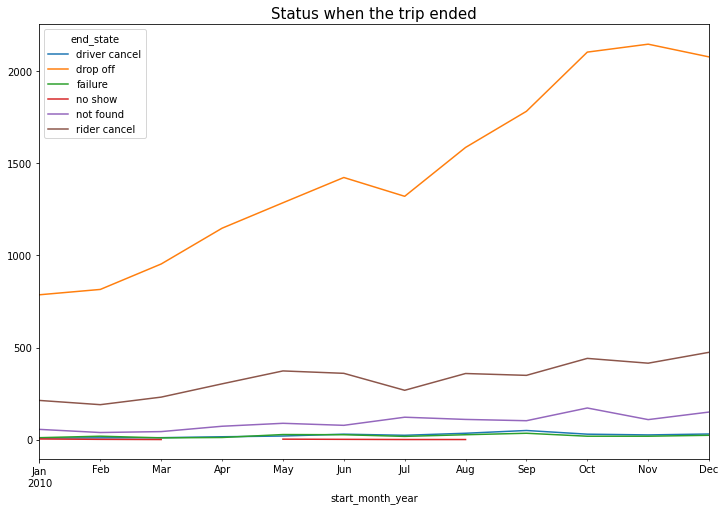

In [99]:
fig, ax = plt.subplots(figsize=(12,8), linewidth=5)
df.groupby(['start_month_year','end_state']).count()['journey_id'].unstack().plot(ax =ax)
plt.title('Status when the trip ended', fontsize=15)

In [57]:
df.columns

Index(['journey_id', 'user_id', 'driver_id', 'taxi_id', 'icon', 'start_type',
       'start_at', 'start_lat', 'start_lon', 'end_at', 'end_lat', 'end_lon',
       'end_state', 'driver_start_lat', 'driver_start_lon', 'arrived_at',
       'currency', 'price', 'price_distance', 'price_duration', 'distance',
       'duration', 'cost', 'cost_distance', 'cost_duration', 'source',
       'driver_score', 'rider_score', 'start_month_year', 'end_month_year'],
      dtype='object')

In [78]:
df_cancelled = df[df["end_state"] == 'rider cancel']['start_type'].value_counts()
y = [0, 500, 1000, 1500, 2000, 2500]

In [75]:
df_cancelled

asap        2828
reserved    1139
delayed        9
Name: start_type, dtype: int64

Text(0.5, 1.0, 'Distribution for users who cancelled the trip regarding to type of urgency')

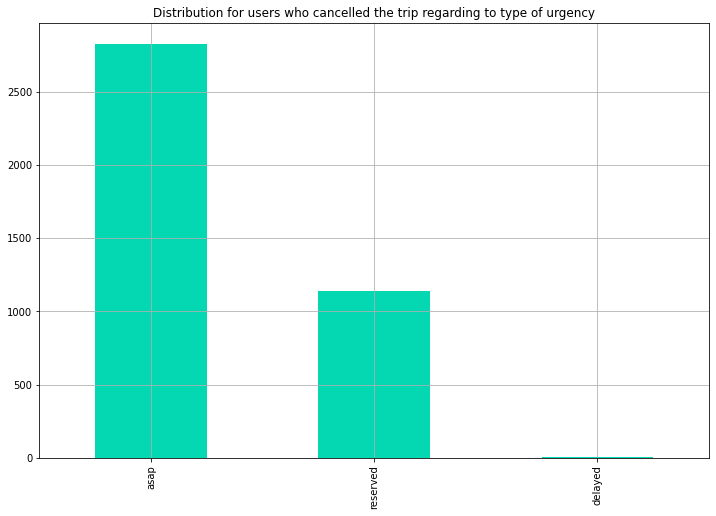

In [100]:
df[df["end_state"] == 'rider cancel']['start_type'].value_counts().plot(kind='bar', figsize=(12,8), color='#04D8B2', grid=True)
plt.title("Distribution for users who cancelled the trip regarding to type of urgency")

In [86]:
df.source.value_counts()

iPhone     9741
web        7631
Android    4909
iPad        571
Wap         136
Name: source, dtype: int64

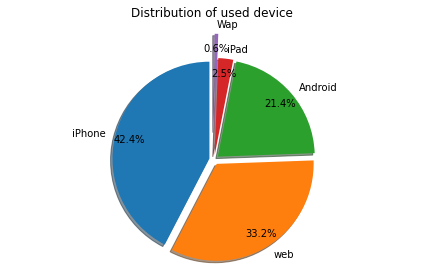

In [93]:
labels = ['iPhone', 'web', 'Android', 'iPad','Wap']
sizes = [9741, 7631, 4909, 571, 136]

explode = (0.05, 0.05, 0.05, 0.05, 0.3)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, pctdistance=0.85)

ax1.axis('equal')  
plt.title('Distribution of used device')
plt.tight_layout()
plt.show()

In [91]:
df[(df['end_state'] == 'rider cancel')|(df['end_state'] == 'failure')]['source'].value_counts()

iPhone     1605
web        1299
Android    1184
iPad         93
Wap          24
Name: source, dtype: int64

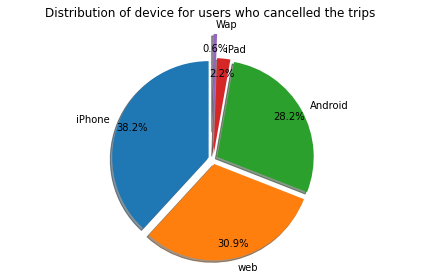

In [90]:
labels = ['iPhone', 'web', 'Android', 'iPad','Wap']
sizes = [1605, 1299, 1184, 93, 24]

# explode all the slides, specially for the "Wap" slide which is too tiny to see
explode = (0.05, 0.05, 0.05, 0.05, 0.3)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, pctdistance=0.85)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.title('Distribution of device for users who cancelled the trips ')
plt.tight_layout()
plt.show()